In [1]:
import pandas as pd
import tools
import numpy as np
import matplotlib.pyplot as plt

# Temporal Analyze to the Basics Experimentations

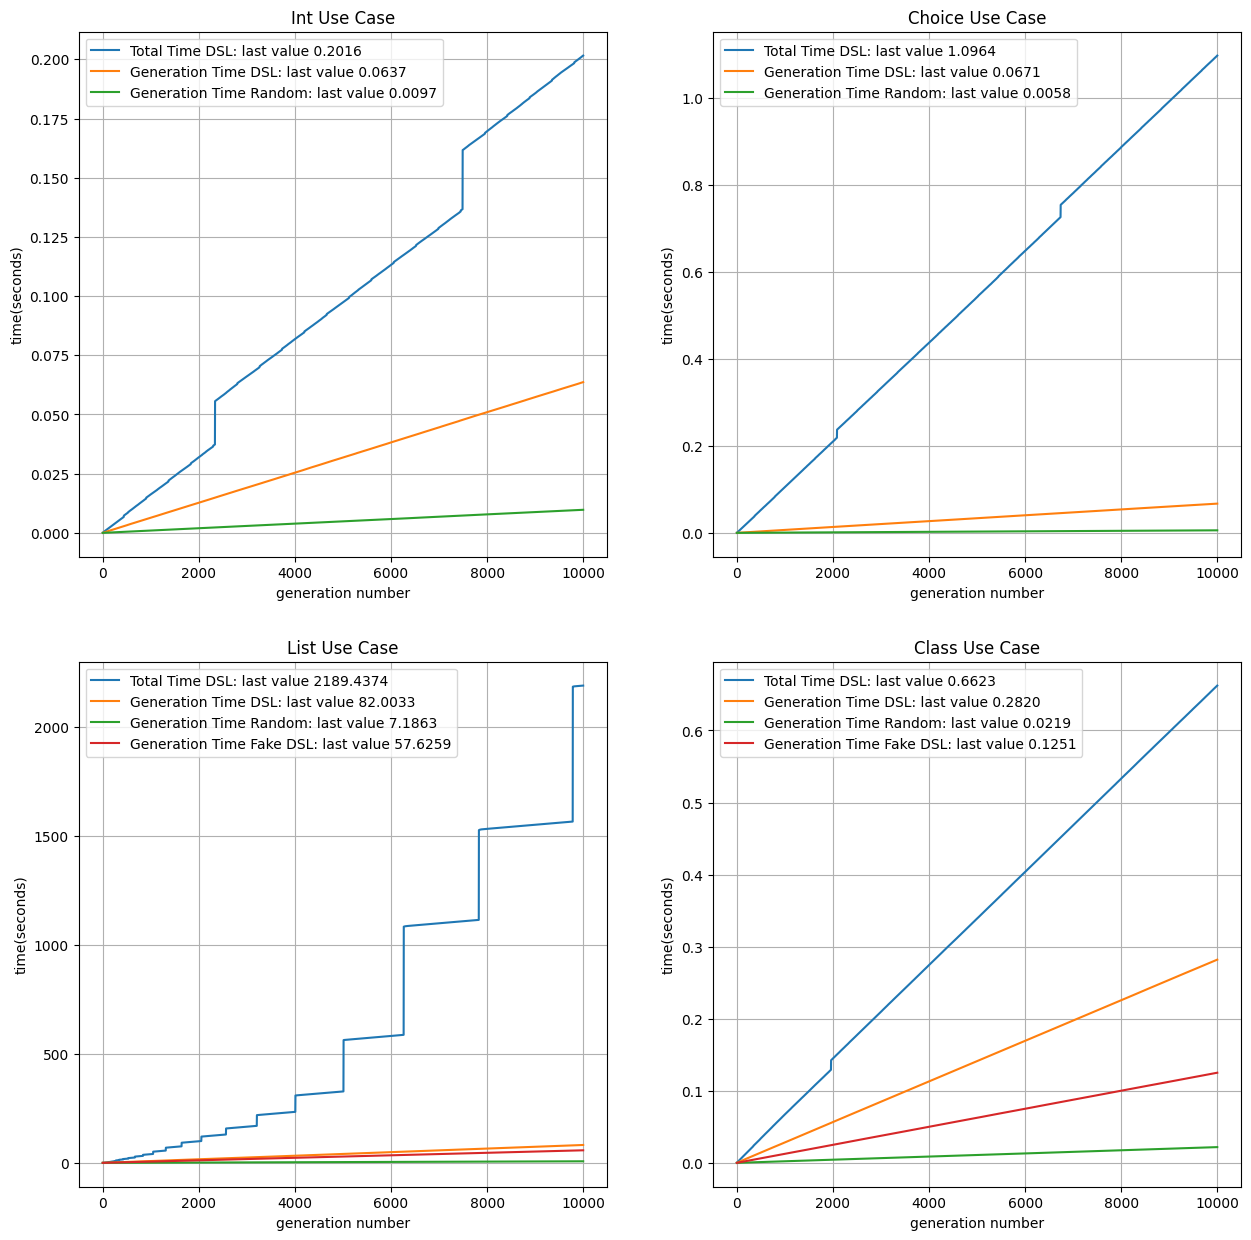

In [27]:
_, ax = plt.subplots(2, 2, figsize=(15, 15))


# Int Data
df = pd.read_csv('csv/int_times.csv')
X = df['index']
Y1 = tools.computing_time(df["time_dsl"])
Y2 = tools.computing_time(df["time_generation"])
Y3 = tools.computing_time(df["time_random"])

ax[0][0].plot(X, Y1, f'C{0}', label=f'Total Time DSL: last value {Y1[-1]:.4f}')
ax[0][0].plot(X, Y2, f'C{1}', label=f'Generation Time DSL: last value {Y2[-1]:.4f}')
ax[0][0].plot(X, Y3, f'C{2}', label=f'Generation Time Random: last value {Y3[-1]:.4f}')
ax[0][0].grid(True)
ax[0][0].set_xlabel("generation number")
ax[0][0].set_ylabel("time(seconds)")
ax[0][0].set_title("Int Use Case")
ax[0][0].legend()


# Int Data
df = pd.read_csv('csv/choice_times.csv')
X = df['index']
Y1 = tools.computing_time(df["time_dsl"])
Y2 = tools.computing_time(df["time_generation"])
Y3 = tools.computing_time(df["time_random"])

ax[0][1].plot(X, Y1, f'C{0}', label=f'Total Time DSL: last value {Y1[-1]:.4f}')
ax[0][1].plot(X, Y2, f'C{1}', label=f'Generation Time DSL: last value {Y2[-1]:.4f}')
ax[0][1].plot(X, Y3, f'C{2}', label=f'Generation Time Random: last value {Y3[-1]:.4f}')
ax[0][1].grid(True)
ax[0][1].set_xlabel("generation number")
ax[0][1].set_ylabel("time(seconds)")
ax[0][1].set_title("Choice Use Case")
ax[0][1].legend()

# List Data 
df = pd.read_csv('csv/list_times.csv')
X = df['index']
Y1 = tools.computing_time(df["time_dsl"])
Y2 = tools.computing_time(df["time_generation"])
Y3 = tools.computing_time(df["time_random"])
Y4 = tools.computing_time(df["time_generation_single"])

ax[1][0].plot(X, Y1, f'C{0}', label=f'Total Time DSL: last value {Y1[-1]:.4f}')
ax[1][0].plot(X, Y2, f'C{1}', label=f'Generation Time DSL: last value {Y2[-1]:.4f}')
ax[1][0].plot(X, Y3, f'C{2}', label=f'Generation Time Random: last value {Y3[-1]:.4f}')
ax[1][0].plot(X, Y4, f'C{3}', label=f'Generation Time Fake DSL: last value {Y4[-1]:.4f}')
ax[1][0].grid(True)
ax[1][0].set_xlabel("generation number")
ax[1][0].set_ylabel("time(seconds)")
ax[1][0].set_title("List Use Case")
ax[1][0].legend()


# Class Data 
df = pd.read_csv('csv/class_times.csv')
X = df['index']
Y1 = tools.computing_time(df["time_dsl"])
Y2 = tools.computing_time(df["time_generation"])
Y3 = tools.computing_time(df["time_random"])
Y4 = tools.computing_time(df["time_generation_single"])

ax[1][1].plot(X, Y1, f'C{0}', label=f'Total Time DSL: last value {Y1[-1]:.4f}')
ax[1][1].plot(X, Y2, f'C{1}', label=f'Generation Time DSL: last value {Y2[-1]:.4f}')
ax[1][1].plot(X, Y3, f'C{2}', label=f'Generation Time Random: last value {Y3[-1]:.4f}')
ax[1][1].plot(X, Y4, f'C{3}', label=f'Generation Time Fake DSL: last value {Y4[-1]:.4f}')
ax[1][1].grid(True)
ax[1][1].set_xlabel("generation number")
ax[1][1].set_ylabel("time(seconds)")
ax[1][1].set_title("Class Use Case")
ax[1][1].legend()

_ = plt.savefig("exp2.png")
# _ = plt.plot()


# Temporal and Attempting Analyze for Set Generation

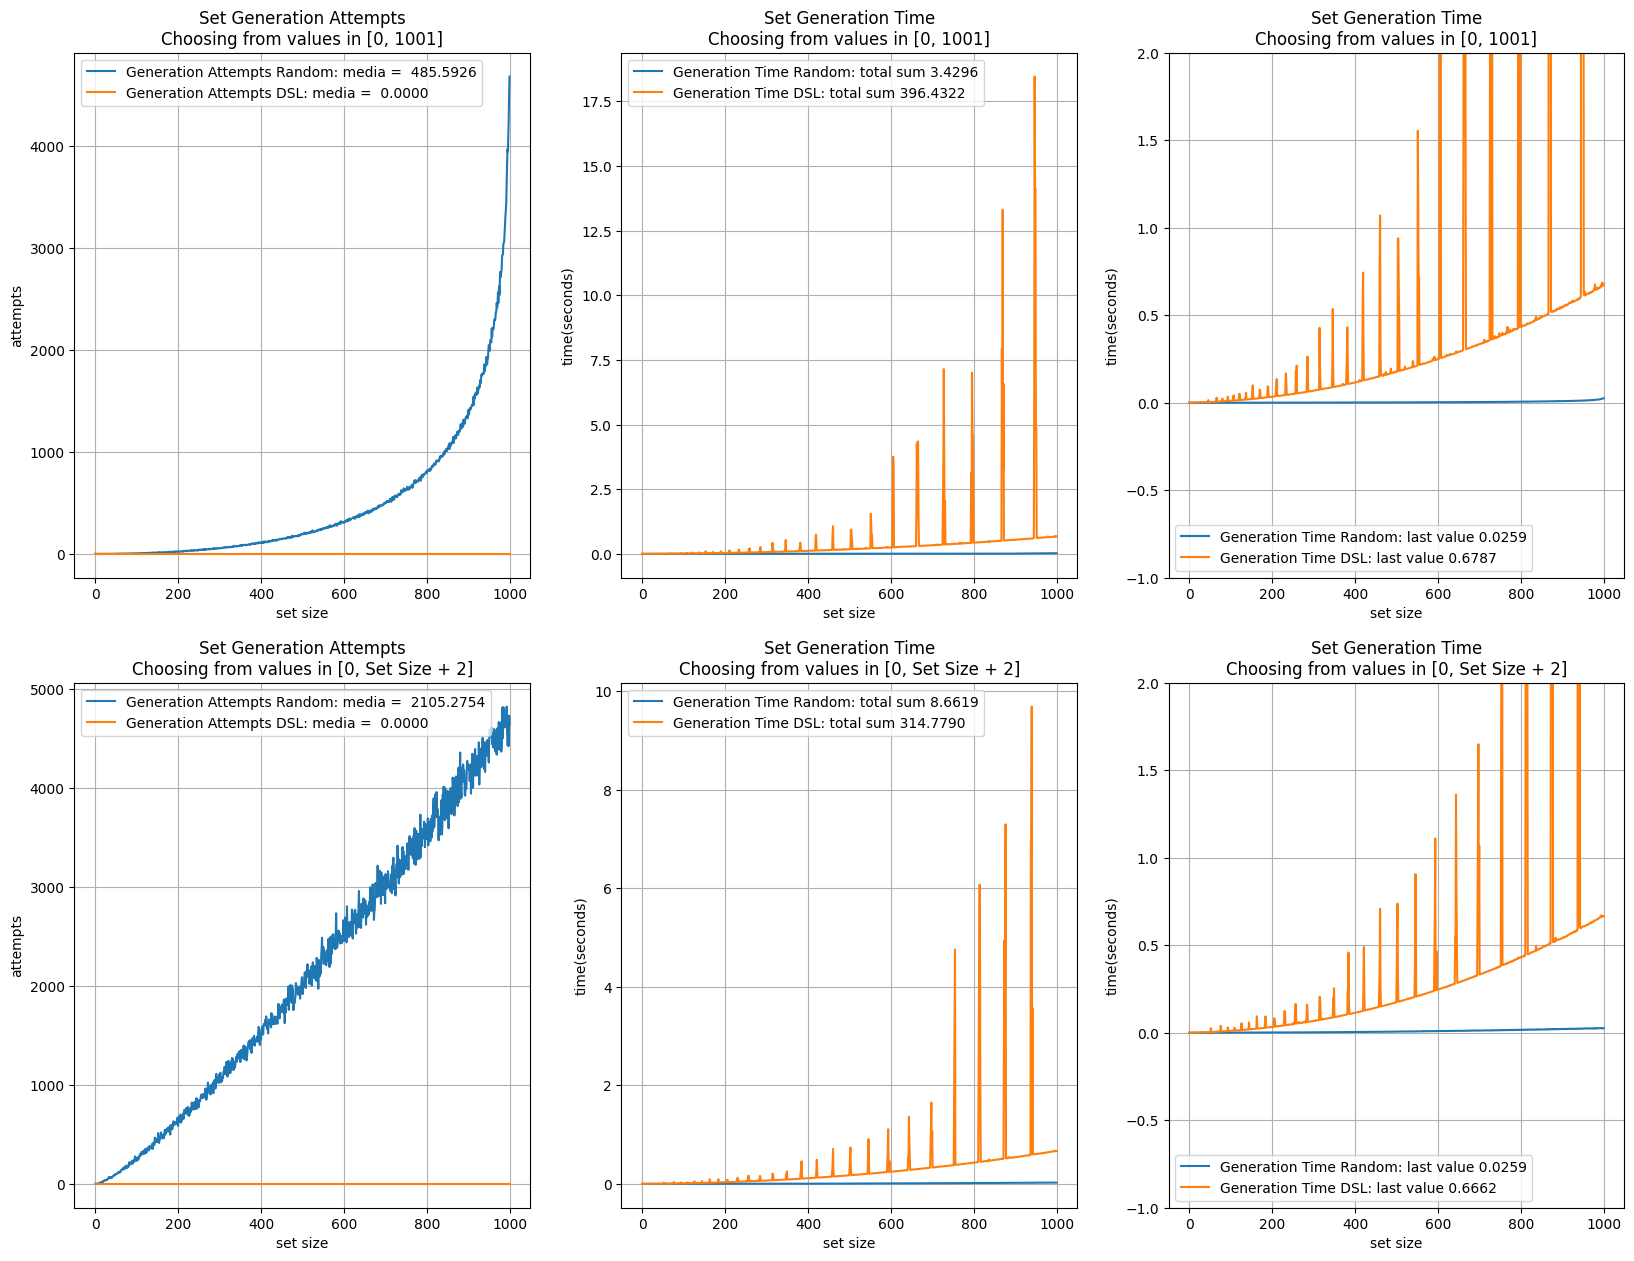

In [31]:
_, ax = plt.subplots(2, 3, figsize=(20, 15))


df = pd.read_csv('csv/set_randint_data.csv')
X = df['iter_num'].unique()
df = df.groupby('iter_num')
Y1 = df['time'].mean()
t = df['time'].mean().sum().tolist()
l = df['time'].mean().iloc[-1]
Y2 = df['attempts'].mean()
a = df['attempts'].mean().mean().tolist()

ax[0][1].plot(X, Y1, f'C{0}', label=f'Generation Time Random: total sum {t:.4f}')
ax[0][2].plot(X, Y1, f'C{0}', label=f'Generation Time Random: last value {l:.4f}')
ax[0][0].plot(X, Y2, f'C{0}', label=f'Generation Attempts Random: media =  {a:.4f}')


df = pd.read_csv('csv/set_dsl_data.csv')
X = df['iter_num'].unique()
df = df.groupby('iter_num')
Y1 = df['time'].mean()
t = df['time'].mean().sum().tolist()
l = df['time'].mean().iloc[-1]
Y2 = df['attempts'].mean()
a = df['attempts'].mean().mean().tolist()

ax[0][1].plot(X, Y1, f'C{1}', label=f'Generation Time DSL: total sum {t:.4f}')
ax[0][2].plot(X, Y1, f'C{1}', label=f'Generation Time DSL: last value {l:.4f}')
ax[0][0].plot(X, Y2, f'C{1}', label=f'Generation Attempts DSL: media =  {a:.4f}')



df = pd.read_csv('csv/set_2_randint_data.csv')
X = df['iter_num'].unique()
df = df.groupby('iter_num')
Y1 = df['time'].mean()
t = df['time'].mean().sum().tolist()
l = df['time'].mean().iloc[-1]
Y2 = df['attempts'].mean()
a = df['attempts'].mean().mean().tolist()

ax[1][1].plot(X, Y1, f'C{0}', label=f'Generation Time Random: total sum {t:.4f}')
ax[1][2].plot(X, Y1, f'C{0}', label=f'Generation Time Random: last value {l:.4f}')
ax[1][0].plot(X, Y2, f'C{0}', label=f'Generation Attempts Random: media =  {a:.4f}')


df = pd.read_csv('csv/set_2_dsl_data.csv')
X = df['iter_num'].unique()
df = df.groupby('iter_num')
Y1 = df['time'].mean()
t = df['time'].mean().sum().tolist()
l = df['time'].mean().iloc[-1]
Y2 = df['attempts'].mean()
a = df['attempts'].mean().mean().tolist()

ax[1][1].plot(X, Y1, f'C{1}', label=f'Generation Time DSL: total sum {t:.4f}')
ax[1][2].plot(X, Y1, f'C{1}', label=f'Generation Time DSL: last value {l:.4f}')
ax[1][0].plot(X, Y2, f'C{1}', label=f'Generation Attempts DSL: media =  {a:.4f}')





ax[0][0].grid(True)
ax[0][0].set_xlabel("set size")
ax[0][0].set_ylabel("attempts")
ax[0][0].set_title("Set Generation Attempts\nChoosing from values in [0, 1001]")
ax[0][0].legend()

ax[0][1].grid(True)
ax[0][1].set_xlabel("set size")
ax[0][1].set_ylabel("time(seconds)")
ax[0][1].set_title("Set Generation Time\nChoosing from values in [0, 1001]")
ax[0][1].legend()

ax[0][2].set_ylim(-1, 2)
ax[0][2].grid(True)
ax[0][2].set_xlabel("set size")
ax[0][2].set_ylabel("time(seconds)")
ax[0][2].set_title("Set Generation Time\nChoosing from values in [0, 1001]")
ax[0][2].legend()

ax[1][0].grid(True)
ax[1][0].set_xlabel("set size")
ax[1][0].set_ylabel("attempts")
ax[1][0].set_title("Set Generation Attempts\nChoosing from values in [0, Set Size + 2]")
ax[1][0].legend()

ax[1][1].grid(True)
ax[1][1].set_xlabel("set size")
ax[1][1].set_ylabel("time(seconds)")
ax[1][1].set_title("Set Generation Time\nChoosing from values in [0, Set Size + 2]")
ax[1][1].legend()

ax[1][2].set_ylim(-1, 2)
ax[1][2].grid(True)
ax[1][2].set_xlabel("set size")
ax[1][2].set_ylabel("time(seconds)")
ax[1][2].set_title("Set Generation Time\nChoosing from values in [0, Set Size + 2]")
ax[1][2].legend()


_ = plt.savefig("exp3.png")
# _ = plt.plot()

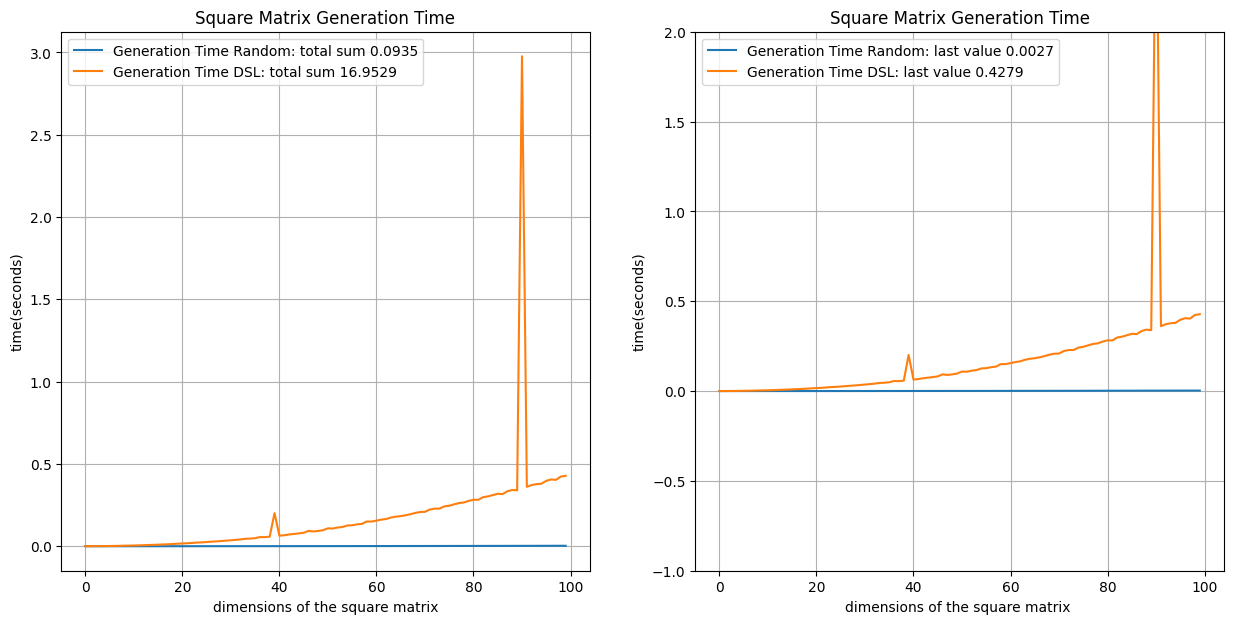

In [32]:
_, ax = plt.subplots(1, 2, figsize=(15, 7))


df = pd.read_csv('csv/matrix_randint_data.csv')
X = df['iter_num'].unique()
df = df.groupby('iter_num')
Y1 = df['time'].mean()
t = df['time'].mean().sum().tolist()
l = df['time'].mean().iloc[-1]
Y2 = df['attempts'].mean()
a = df['attempts'].mean().mean().tolist()

ax[0].plot(X, Y1, f'C{0}', label=f'Generation Time Random: total sum {t:.4f}')
ax[1].plot(X, Y1, f'C{0}', label=f'Generation Time Random: last value {l:.4f}')
# ax[0].plot(X, Y2, f'C{0}', label=f'Generation Attempts Random: media =  {a:.4f}')


df = pd.read_csv('csv/matrix_dsl_data.csv')
X = df['iter_num'].unique()
df = df.groupby('iter_num')
Y1 = df['time'].mean()
t = df['time'].mean().sum().tolist()
l = df['time'].mean().iloc[-1]
Y2 = df['attempts'].mean()
a = df['attempts'].mean().mean().tolist()

ax[0].plot(X, Y1, f'C{1}', label=f'Generation Time DSL: total sum {t:.4f}')
ax[1].plot(X, Y1, f'C{1}', label=f'Generation Time DSL: last value {l:.4f}')
# ax[0].plot(X, Y2, f'C{1}', label=f'Generation Attempts DSL: media =  {a:.4f}')


ax[0].grid(True)
ax[0].set_xlabel("dimensions of the square matrix")
ax[0].set_ylabel("time(seconds)")
ax[0].set_title("Square Matrix Generation Time")
ax[0].legend()

ax[1].set_ylim(-1, 2)
ax[1].grid(True)
ax[1].set_xlabel("dimensions of the square matrix ")
ax[1].set_ylabel("time(seconds)")
ax[1].set_title("Square Matrix Generation Time")
ax[1].legend()

_ = plt.savefig("exp4.png")
# _ = plt.plot()

# Temporal and Attempting Analyze for Event Find 

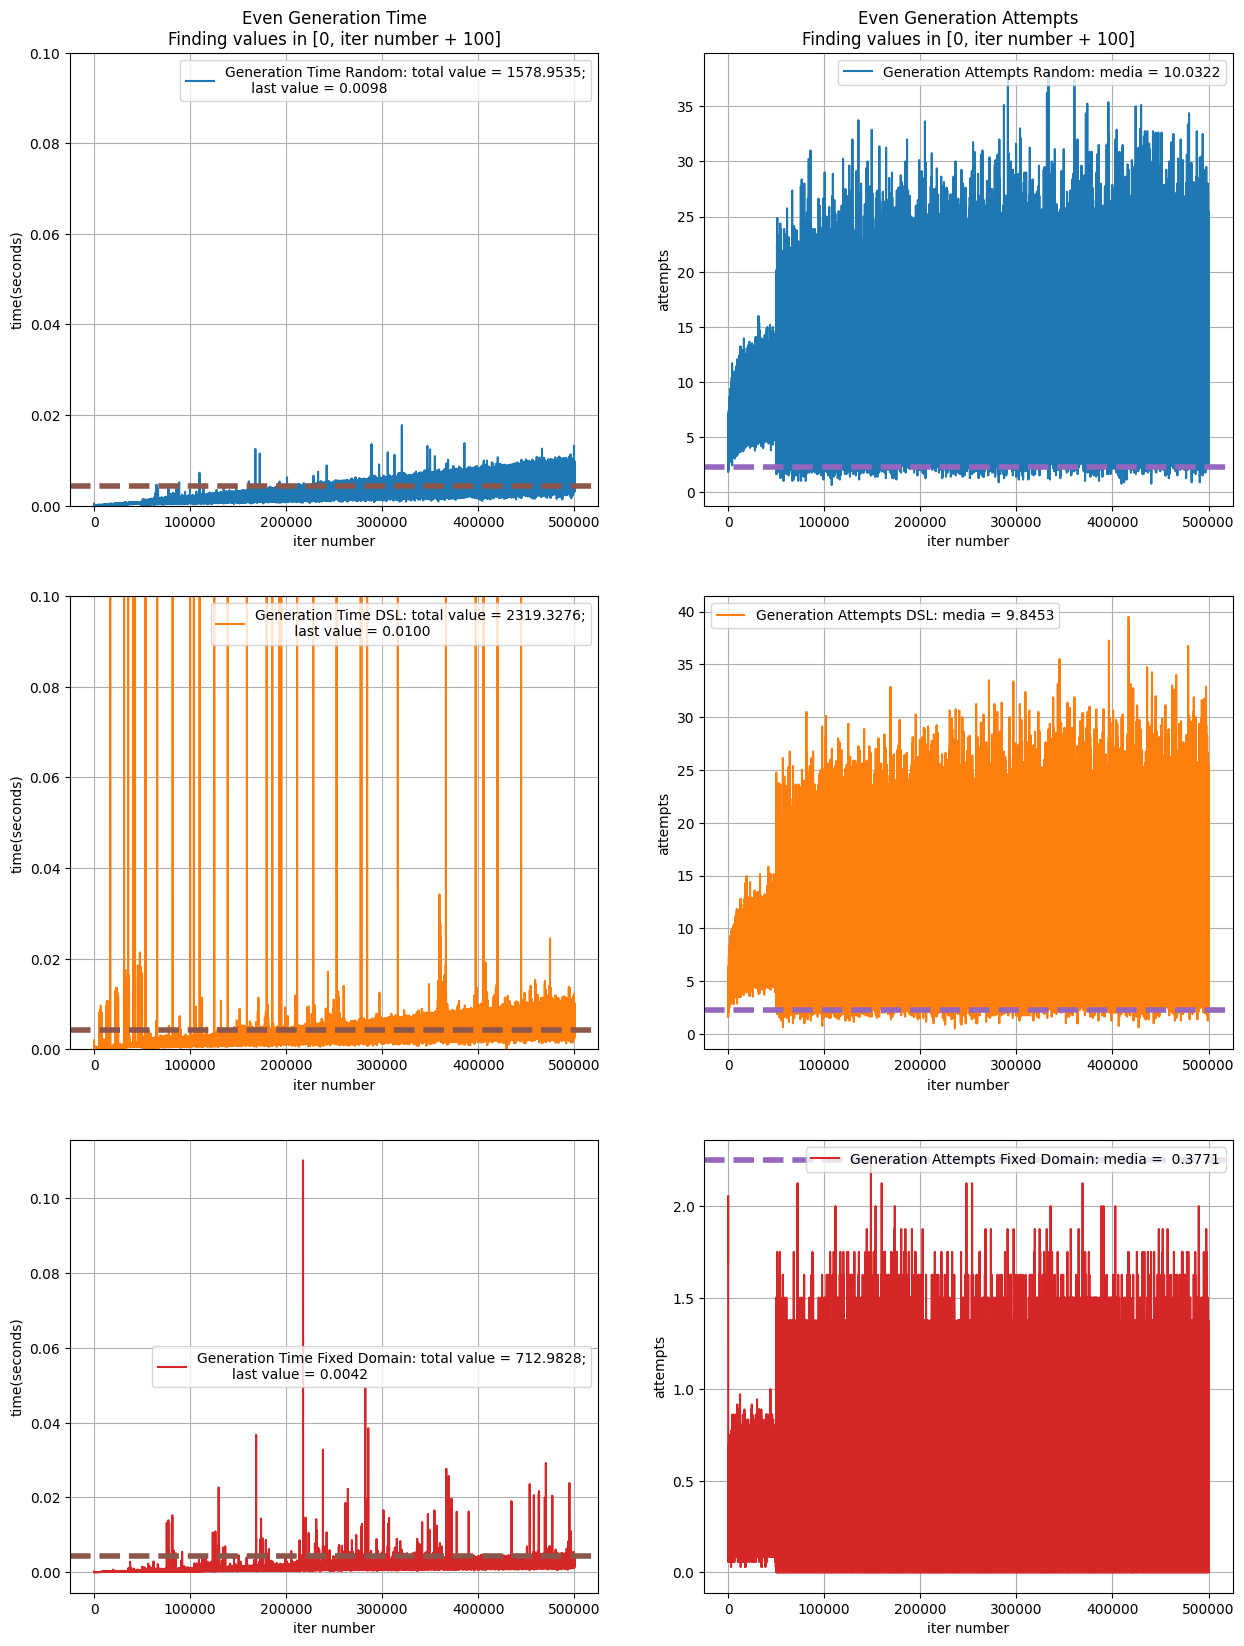

In [35]:
_, ax = plt.subplots(3, 2, figsize=(15, 20))

df = pd.read_csv('csv/even_randint_data.csv')

X = df['iter_num'].unique().tolist()
df = df.groupby('iter_num')
Y1 = df['time'].mean()
t = df['time'].mean().sum().tolist()
l = df['time'].mean().iloc[-200:].max().tolist()
Y2 = df['attempts'].mean().tolist()
a = df['attempts'].mean().mean().tolist()
Y3 = df['value_repetition'].mean()
v = df['value_repetition'].mean().mean().tolist()



ax[0][0].plot(X, Y1, f'C{0}', label=f'Generation Time Random: total value = {t:.4f};\n      last value = {l:.4f}')
# ax[2].plot(X, Y3, f'C{0}', label=f'Generation Attempts Repetition Random: media = {v:.4f}')
ax[0][1].plot(X, Y2, f'C{0}', label=f'Generation Attempts Random: media = {a:.4f}')



df = pd.read_csv('csv/even_dsl_data.csv')

X = df['iter_num'].unique()
df = df.groupby('iter_num')
Y1 = df['time'].mean()
t = df['time'].mean().sum().tolist()
l = df['time'].mean().iloc[-200:].max().tolist()
Y2 = df['attempts'].mean().tolist()
a = df['attempts'].mean().mean().tolist()
Y3 = df['value_repetition'].mean()
v = df['value_repetition'].mean().mean().tolist()


ax[1][0].plot(X, Y1, f'C{1}', label=f'Generation Time DSL: total value = {t:.4f};\n         last value = {l:.4f}')
# ax[2].plot(X, Y3, f'C{1}', label=f'Generation Attempts Repetition DSL: media = {v:.4f}')
ax[1][1].plot(X, Y2, f'C{1}', label=f'Generation Attempts DSL: media = {a:.4f}')



df = pd.read_csv('csv/even_trap_data.csv')
df = pd.read_csv('csv/even_trap_plus_data.csv')


X = df['iter_num'].unique()
df = df.groupby('iter_num')
Y1 = df['time'].mean()
t = df['time'].mean().sum().tolist()
l = df['time'].mean().iloc[-200:].max().tolist()
Y2 = df['attempts'].mean()
a = df['attempts'].mean().mean().tolist()
Y3 = df['value_repetition'].mean()
v = df['value_repetition'].mean().mean().tolist()


# ax[2][0].plot(X, Y1, f'C{2}', label=f'Generation Time Domain Hierarchy: total value = {t:.4f}; last value = {l:.4f}')
# # ax[2].plot(X, Y3, f'C{2}', label=f'Generation Attempts Repetition Domain Hierarchy: media = {v:.4f}')
# ax[2][1].plot(X, Y2, f'C{2}', label=f'Generation Attempts Domain Hierarchy: media = {a:.4f}')

# df = pd.read_csv('csv/even_trap_plus_data.csv')

# X = df['iter_num'].unique()
# df = df.groupby('iter_num')
# Y1 = df['time'].mean()
# t = df['time'].mean().sum().tolist()
# l = df['time'].mean().iloc[-200:].max().tolist()
# Y2 = df['attempts'].mean()
# a = df['attempts'].mean().mean().tolist()
# Y3 = df['value_repetition'].mean()
# v = df['value_repetition'].mean().mean().tolist()


ax[2][0].plot(X, Y1, f'C{3}', label=f'Generation Time Fixed Domain: total value = {t:.4f};\n        last value = {l:.4f}')
# ax[2].plot(X, Y3, f'C{3}', label=f'Generation Attempts Repetition Fixed Domain: media = {v:.4f}')
ax[2][1].plot(X, Y2, c=f'C{3}', label=f'Generation Attempts Fixed Domain: media =  {a:.4f}')

minn = Y1.max()
minn2 = Y2.max()

ax[0][0].grid(True)
ax[0][0].set_xlabel("iter number")
ax[0][0].set_ylabel("time(seconds)")
ax[0][0].set_title("Even Generation Time\nFinding values in [0, iter number + 100]")
ax[0][0].legend()
ax[0][0].set_ylim(0, 0.1)
# ax[0][0].axhline(y=minn, color='C4', linestyle='--', linewidth=4.0)
ax[0][0].axhline(y=l, color='C5', linestyle='--', linewidth=4.0)
ax[0][1].grid(True)
ax[0][1].set_xlabel("iter number")
ax[0][1].set_ylabel("attempts")
ax[0][1].set_title("Even Generation Attempts\nFinding values in [0, iter number + 100]")
ax[0][1].legend()
ax[0][1].axhline(y=minn2, color='C4', linestyle='--', linewidth=4.0)


ax[1][0].grid(True)
ax[1][0].set_xlabel("iter number")
ax[1][0].set_ylabel("time(seconds)")
ax[1][0].set_ylim(0, 0.1)

# ax[1][0].set_title("Set Generation Attempts")
ax[1][0].legend()
# ax[1][0].axhline(y=minn, color='C4', linestyle='--', linewidth=4.0)
ax[1][0].axhline(y=l, color='C5', linestyle='--', linewidth=4.0)

ax[1][1].grid(True)
ax[1][1].set_xlabel("iter number")
ax[1][1].set_ylabel("attempts")
# ax[1][1].set_title("Set Generation Attempts")
ax[1][1].legend()
ax[1][1].axhline(y=minn2, color='C4', linestyle='--',linewidth=4.0)


# ax[2][0].grid(True)
# ax[2][0].set_xlabel("generation number")
# ax[2][0].set_ylabel("attempts")
# ax[2][0].set_ylim(0, 0.1)

# # ax[2][0].set_title("Set Generation Attempts")
# ax[2][0].legend()
# ax[2][0].axhline(y=minn, color='C4', linestyle='--', linewidth=4.0)
# ax[2][0].axhline(y=l, color='C5', linestyle='--', linewidth=4.0)

# ax[2][1].grid(True)
# ax[2][1].set_xlabel("generation number")
# ax[2][1].set_ylabel("attempts")
# # ax[2][1].set_title("Set Generation Attempts")
# ax[2][1].legend()
# ax[2][1].axhline(y=minn2, color='C4', linestyle='--', linewidth=4.0)

ax[2][0].grid(True)
ax[2][0].set_xlabel("iter number")
ax[2][0].set_ylabel("time(seconds)")
# a2[3][0].set_ylim(0, 0.1)
# ax[2][0].axhline(y=minn, color='C4', linestyle='--', linewidth=4.0)
ax[2][0].axhline(y=l, color='C5', linestyle='--', linewidth=4.0)
# a2[3][0].set_title("Set Generation Attempts")
ax[2][0].legend()
ax[2][1].grid(True)
ax[2][1].set_xlabel("iter number")
ax[2][1].set_ylabel("attempts")
# a2[3][1].set_title("Set Generation Attempts")
ax[2][1].legend()
ax[2][1].axhline(y=minn2, color='C4', linestyle='--', linewidth=4.0)


plt.plot()
# plt.save("bache_last_log")
_ = plt.savefig("exp5.png")


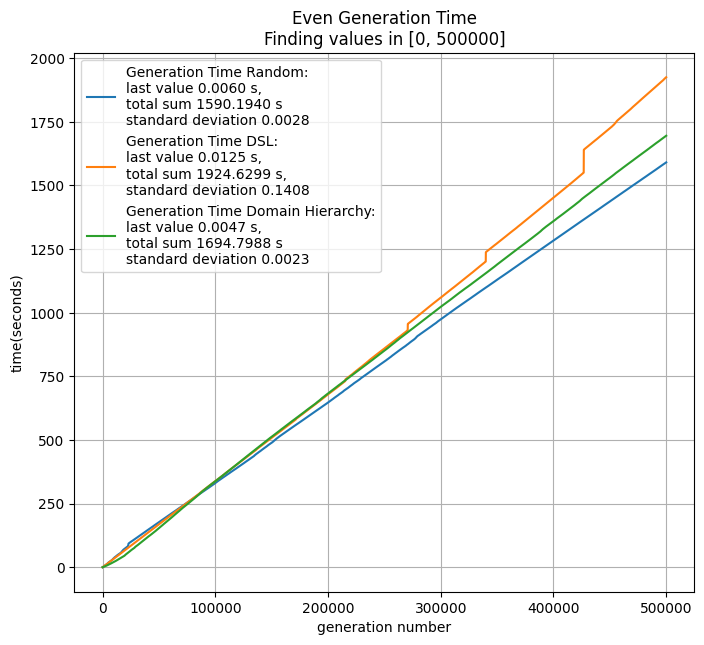

In [52]:
_, ax = plt.subplots(1, 1, figsize=(8, 7))

df = pd.read_csv('csv/even_randint_fixed_data.csv')
std = df['time'].std()

X = df['iter_num'].unique()
df = df.groupby('iter_num')
Y1 = tools.computing_time( df['time'].mean())
Y2 = df['time'].mean()
t = df['time'].mean().sum().tolist()
m = df['time'].mean().mean().tolist()
l = df['time'].mean().iloc[-1]
# Y2 = df['attempts'].mean()
a = df['attempts'].mean().mean().tolist()
# Y2 = df['value_repetition'].mean()
v = df['value_repetition'].mean().mean().tolist()


ax.plot(X, Y1, f'C{0}', label=f'Generation Time Random:\nlast value {l:.4f} s,\ntotal sum {t:.4f} s\nstandard deviation {std:.4f}')
# ax[1].plot(X, Y2, f'C{0}', label=f'Generation Time Random: mean value {m:.4f}')


df = pd.read_csv('csv/even_dsl_fixed_data.csv')
std = df['time'].std()
X = df['iter_num'].unique()

df = df.groupby('iter_num')
Y1 = tools.computing_time( df['time'].mean())
Y2 = df['time'].mean()

t = df['time'].mean().sum().tolist()
m = df['time'].mean().mean().tolist()
l = df['time'].mean().iloc[-1] + 0.012
# Y2 = df['attempts'].mean()
a = df['attempts'].mean().mean().tolist()
# Y2 = df['value_repetition'].mean()
v = df['value_repetition'].mean().mean().tolist()



ax.plot(X, Y1, f'C{1}', label=f'Generation Time DSL:\nlast value {l:.4f} s,\ntotal sum {t:.4f} s,\nstandard deviation {std:.4f}')
# ax[1].plot(X, Y2, f'C{1}', label=f'Generation Time DSL: mean value {m:.4f}')



df = pd.read_csv('csv/even_fixed_data.csv')
std = df['time'].std()

X = df['iter_num'].unique()
df = df.groupby('iter_num')
Y1 = tools.computing_time( df['time'].mean())
Y2 = df['time'].mean()

t = df['time'].mean().sum().tolist()
m = df['time'].mean().mean().tolist()
l = df['time'].mean().iloc[-1]
# Y2 = df['attempts'].mean()
a = df['attempts'].mean().mean().tolist()
# Y2 = df['value_repetition'].mean()
v = df['value_repetition'].mean().mean().tolist()



ax.plot(X, Y1, f'C{2}', label=f'Generation Time Domain Hierarchy:\nlast value {l:.4f} s,\ntotal sum {t:.4f} s\nstandard deviation {std:.4f}')
# ax[1].plot(X, Y2 * -1, f'C{2}', label=f'Generation Time Domain Hierarchy: mean value {m:.4f}')


ax.grid(True)
ax.set_xlabel("generation number")
ax.set_ylabel("time(seconds)")
ax.set_title("Even Generation Time\nFinding values in [0, 500000]")
ax.legend()

# ax[1].grid(True)
# ax[1].set_xlabel("generation number")
# ax[1].set_ylabel("time")
# ax[1].set_title("Set Generation Time")
# ax[1].legend()

plt.plot()
_ = plt.savefig("exp6.png")


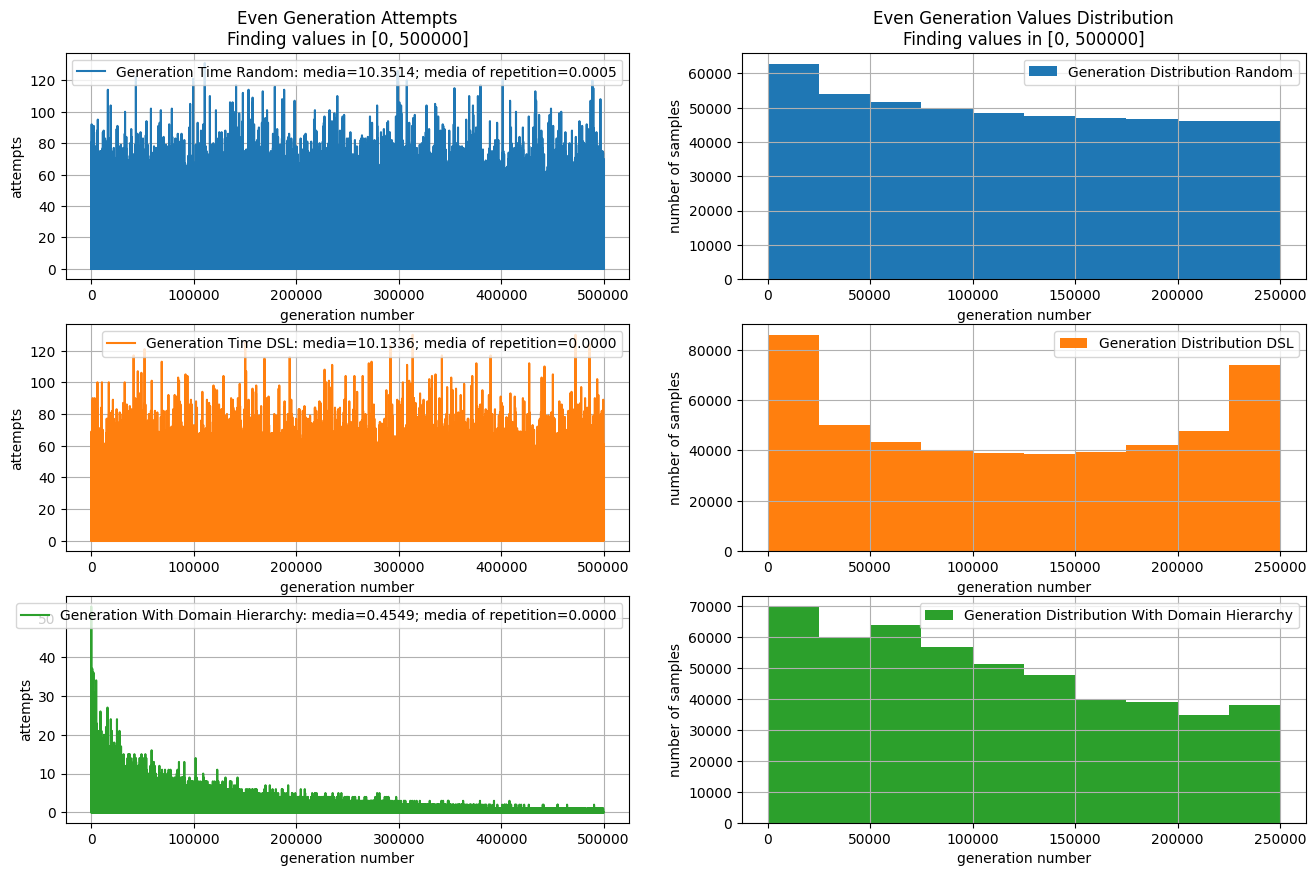

In [53]:
_, ax = plt.subplots(3, 2, figsize=(16, 10))

df = pd.read_csv('csv/even_randint_fixed_data.csv')
X = df['iter_num']
Y1 = df["attempts"]
Y2 = df["value_repetition"]
Y3 = df['value']

m, mr = sum(Y1)/len(Y1), sum(Y2)/len(Y2)
ax[0][0].plot(X, Y1, f'C{0}', label=f'Generation Time Random: media={m:.4f}; media of repetition={mr:.4f}')
ax[0][1].hist(Y3, color = f'C{0}', label=f'Generation Distribution Random')

df = pd.read_csv('csv/even_dsl_fixed_data.csv')
Y1 = df["attempts"]
Y2 = df["value_repetition"]
Y3 = df['value']
m, mr = sum(Y1)/len(Y1), sum(Y2)/len(Y2)

ax[1][0].plot(X, Y1, f'C{1}', label=f'Generation Time DSL: media={m:.4f}; media of repetition={mr:.4f}')
ax[1][1].hist(Y3, color = f'C{1}', label=f'Generation Distribution DSL')


df = pd.read_csv('csv/even_fixed_data.csv')
Y1 = df["attempts"]
Y2 = df["value_repetition"]
Y3 = df['value']
m, mr = sum(Y1)/len(Y1), sum(Y2)/len(Y2)

ax[2][0].plot(X, Y1, f'C{2}', label=f'Generation With Domain Hierarchy: media={m:.4f}; media of repetition={mr:.4f}')
ax[2][1].hist(Y3, color = f'C{2}', label=f'Generation Distribution With Domain Hierarchy')


ax[0][0].grid(True)
ax[0][0].set_xlabel("generation number")
ax[0][0].set_ylabel("attempts")
ax[0][0].set_title("Even Generation Attempts\nFinding values in [0, 500000]")
ax[0][0].legend()
ax[1][0].grid(True)
ax[1][0].set_xlabel("generation number")
ax[1][0].set_ylabel("attempts")
# ax[1][0].set_title("Set Generation Time")
ax[1][0].legend()
ax[2][0].grid(True)
ax[2][0].set_xlabel("generation number")
ax[2][0].set_ylabel("attempts")
# ax[2][0].set_title("Set Generation Time")
ax[2][0].legend()

ax[0][1].grid(True)
ax[0][1].set_xlabel("generation number")
ax[0][1].set_ylabel("number of samples")
ax[0][1].set_title("Even Generation Values Distribution\nFinding values in [0, 500000]")
ax[0][1].legend()
ax[1][1].grid(True)
ax[1][1].set_xlabel("generation number")
ax[1][1].set_ylabel("number of samples")
# ax[1][1].set_title("Set Generation Time")
ax[1][1].legend()
ax[2][1].grid(True)
ax[2][1].set_xlabel("generation number")
ax[2][1].set_ylabel("number of samples")
# ax[2][1].set_title("Set Generation Time")
ax[2][1].legend()

# plt.plot()

_ = plt.savefig("exp7.png")


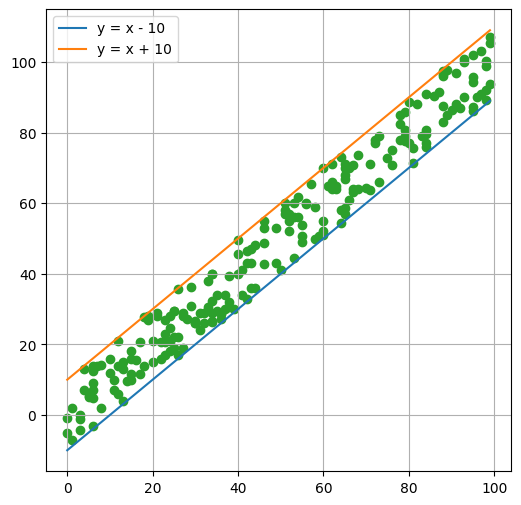

In [54]:
_, ax = plt.subplots(1, 1, figsize=(6, 6))




X = [i for i in range(100)]
Y = [i + 10 for i in X]
Y1 = [i - 10 for i in X]

ax.plot(X, Y1, f'C{0}', label=f'y = x - 10')
ax.plot(X, Y, f'C{1}', label=f'y = x + 10')

df = pd.read_csv('csv/points.csv')

ax.scatter(df['x'], df['y'], color='C2')


ax.grid(True)
ax.legend()

_ = plt.savefig("center.png")